# Final Exam
## MAC0459 - 2019/2
### Matheus Tararam de Laurentys - 9793714

## Q1) EDA

### Dataset brief
This dataset contains companies, daparture, arrival, tickets and travel information on flights that arrived or depated in Brazil (or both). It is very important to notice that the table does not contain an entry (row) for each flight, but one for each month/year a company served a given trajectory. In this entry you will find data for the sum of flights that flew in given data/trajectory/company.

### Questions
1) What is the distribution of number of international flights that arrive in Brazil by company and airport?

2) What is the difference in international arrival/departure value throughout the years?

3) What are the $CO_2$ emissions of the flights throughout the years (only for brazilian companies)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import isnan
from scipy.stats import gaussian_kde

In [2]:
def dist_plot(xlim, vals, name):
    ax = vals.plot.kde()
    ax.set_xlim(xlim)
    plt.show()

def bar_plot(vals, aname):
    name = "up to the 10 most significants " + aname
    svals = vals.sort_values(ascending=False).head(10).plot(kind='bar',
                                    figsize=(30,8),
                                    title=name)
    plt.show()

def dist_plot_column(df, col_name, xlim=(0, 4000)):
    name = "Distribution of " + col_name
    ax = df[col_name].value_counts().plot.kde(title=name)
    ax.set_xlim(xlim)    
def bar_plot_column(df, col_name):
    name = "up to the 10 most significants " + col_name
    ax = df[col_name].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                    figsize=(30,8),
                                    title=name)

In [3]:
data_raw = pd.read_csv("dados_estatisticos_utf.csv", sep=";", decimal=",")

In [4]:
P_P = "PASSAGEIROS PAGOS"
P_G = "PASSAGEIROS GRÁTIS"
D = "DECOLAGENS"

### 1)

The part one of this data vizualization below confirms what someone would expect: there are few companies that host a big number of flights and many companies that host fewer flights.
Part two, however came to me as a surprise. I expected that many more people would arrive in Brazil from the biggest cities in the planet (like New York, Beijing and Tokyo). However the biggest five cities from where people arrive here are Maimi, Buenos Aires, Santiago, Lisboa and Uruguay. I think, maybe, Miami and Lisboa would be home of connecting flights from the US/Canada and Europe/CIS. However, the number of people that arrive from Buenos Aires is greater than the number that arrive from Lisboa. In this sense there would be more people arriving from a singel country than the whole UE, which is contrary to what I exepected.

One important thing to notice is that flights are much better distributed on campanies than on airports.

Company distribution:


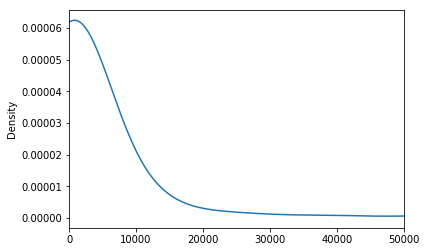

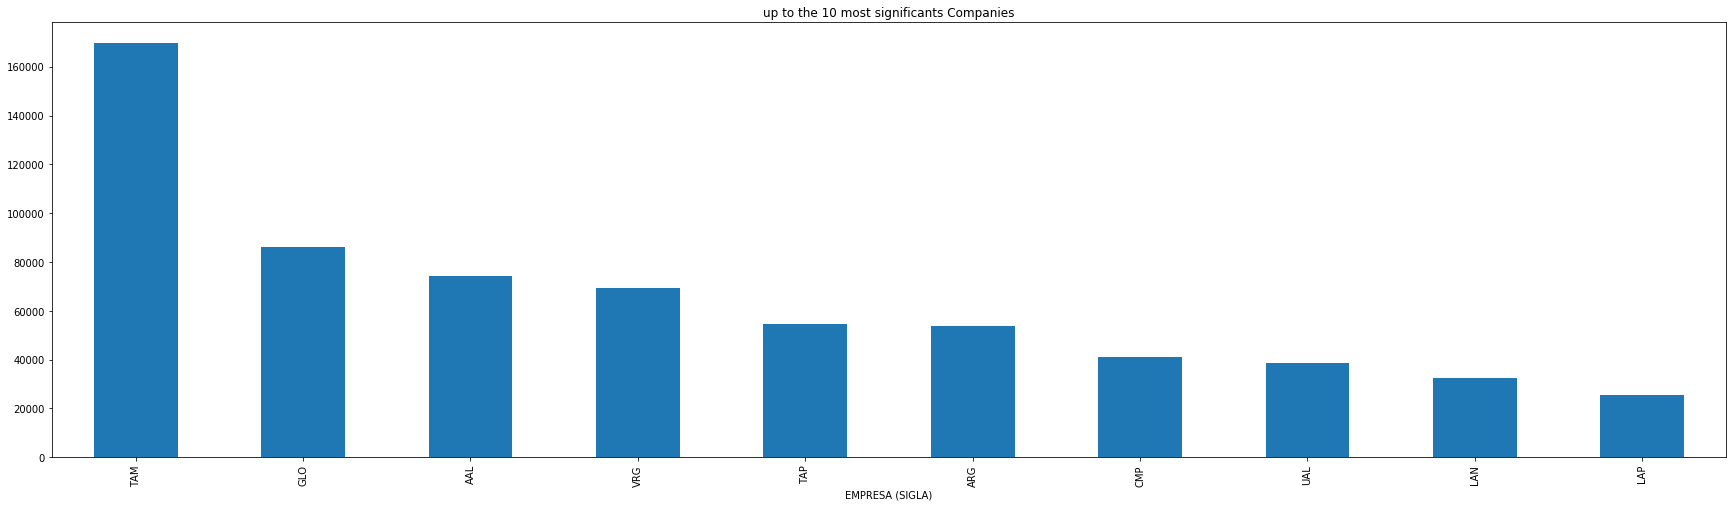

Airport distribution:


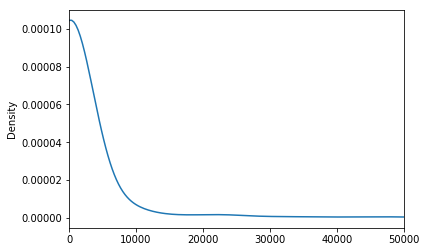

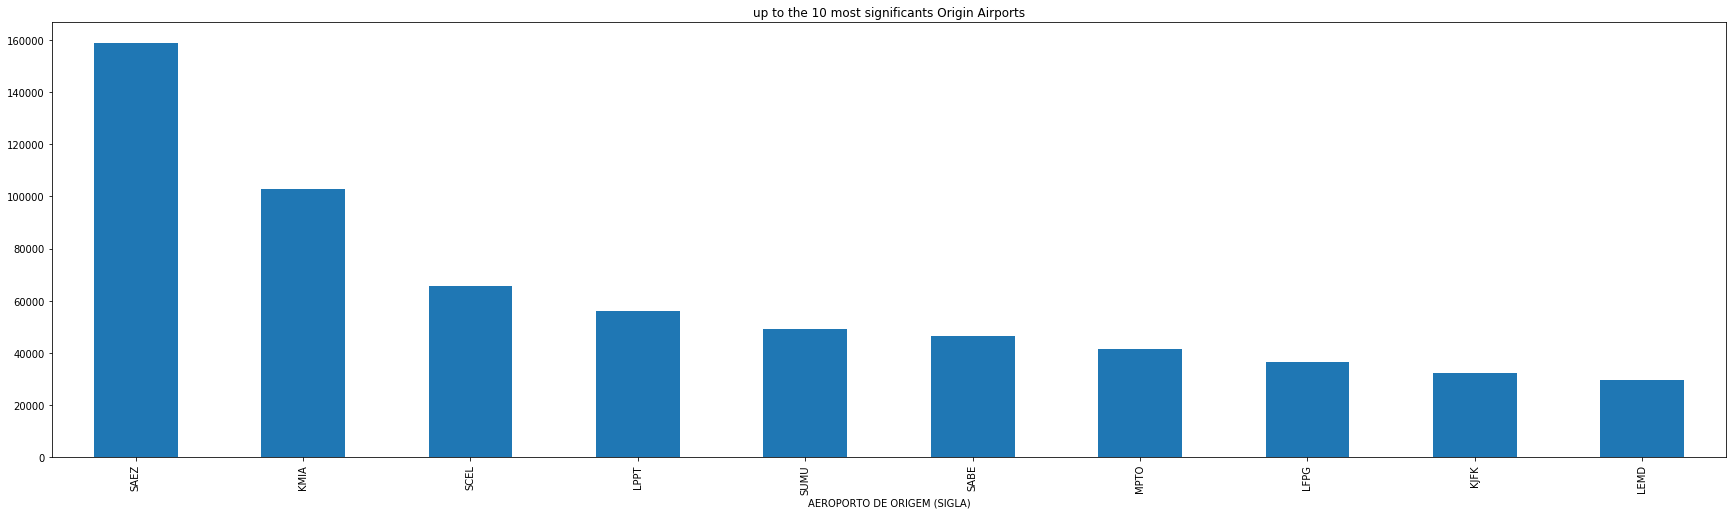

In [14]:
q1_data = data_raw.loc[(data_raw["NATUREZA"] == "Internacional") &
                       (data_raw["AEROPORTO DE DESTINO (PAÍS)"] == "BRASIL")]
q1_by_company = q1_data.groupby("EMPRESA (SIGLA)")
q1_by_airport = q1_data.groupby("AEROPORTO DE ORIGEM (SIGLA)")
print("Company distribution:\n=================================")
departures= q1_by_company[D].sum()
dist_plot([0, 50000], departures, "Numbers of Flights")
bar_plot(departures, "Companies")
print("Airport distribution:\n=================================")
departures= q1_by_airport[D].sum()
dist_plot([0, 50000], departures, "Numbers of Flights")
bar_plot(departures, "Origin Airports")
plt.show()

### 2)

The Data Vizualization of this segment is interesting, and it does go accordingly (reasonably) to what I expected. It might show some data bias but I don't think I can make that relation.

I believe it is normal for a country to have as many arrivals as departures (since most citizens that leave, come back in ashort span of time). If we were to count only the tourism movement, we would have aprroximately 50% of arrivals and 50% of departures. Any difference in this number is due to people arriving in a country and leaving in a different one (if we accept that this dataset covers all flights that arrived or departed in Brazil) or people really moving.
As you can see, in the last 20 years, many more people left than arrived (as, the coeficient is smaller than 1.0). However, we can also see a great deal of change in this short period of time. I do not have a strong reason to explain this. I could be caused by the denegration of the country economy, but the reason why more people leave isunclear.

In [6]:
q2_data = data_raw.loc[(data_raw["NATUREZA"] == "Internacional")].dropna(subset=[D, P_P, P_G])
arrivals = {}
departures = {}
for i in range(2000, 2020):
    arrivals[i] = 0
    departures[i] = 0
for _, flight in q2_data.iterrows():
    ano = flight["ANO"]
    passengers = flight[P_P] + flight[P_G]
    if(flight["AEROPORTO DE DESTINO (PAÍS)"] == "BRASIL"):
        arrivals[ano] += passengers
    else:
        departures[ano] += passengers

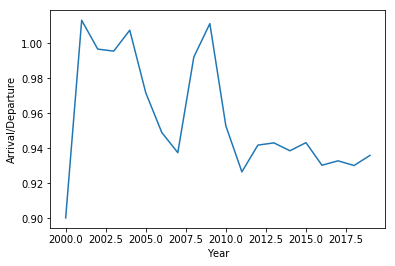

In [7]:
yvals = [arrivals[i]/departures[i] for i in range(2000, 2020)]
xvals = np.arange(2000, 2020)
plt.ylabel("Arrival/Departure")
plt.xlabel("Year")
plt.plot(xvals, yvals)

### 3)

For this segment we will suppose that 90% of the fuel in the airplane is consumed. I am also defining the $CO_2$ emission to be 100% reliant on the amount of fuel used. Since the fuel may vary, I know this is not a accurate representation of reality. I am using a standard I [found](https://www.verifavia.com/greenhouse-gas-verification/fq-how-are-aircraft-co2-emissions-calculated-11.php): ${0.8kg (CO_2)}\over{1L (airplane fuel)}$

The fuel value, unfortunately, only give information about Brazilian companies. What we can say is that the distance traveled with airplanes of Brazilian companies incresed tremendously (about 25% increase from 2000 to 2019). However, if we accept that this change reflects a global tendency, then the emissions might reach a dangerous level very soon.

In [8]:
STRING = "COMBUSTÍVEL (LITROS) - APENAS EMPRESAS BRASILEIRAS"

def float_fuel(x):
    s = str(q3_data[STRING]).replace(",", ".")
    print(s)
    q3_data[STRING] = float(s)

q3_data = ( 
            data_raw
            .dropna(subset=[STRING])
            .groupby("ANO")
           )
fuels = q3_data[STRING].sum()
for f in fuels: f *= 0.8 * 0.9

<BarContainer object of 20 artists>

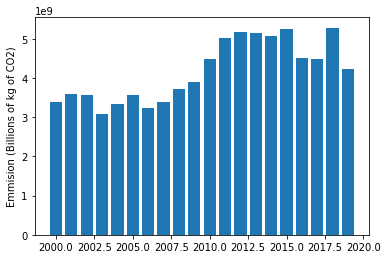

In [9]:
plt.ylabel("Emmision (Billions of kg of CO2)")
plt.bar(xvals, fuels)

## Q2)

I am adding the delay and cancelation dataset because I think it better fits the focus I gave on question 1. Making a little change to the quations:

1) What is the distribution of number of international flights cancelation that arrive in Brazil by company and airport?

2) What is the difference in international (arrival cancelation/departure cancelation) value throughout the years?

In [10]:
q2_raw = pd.read_csv("AnexoI_utf.csv", sep=";", decimal=",") 



### 1) 
This question gives an interessting point: there is a very large number of companies that have an acceptable cancelation rate (below 10%), however, there is a reasonable sized group that has around 15% cancelation rate. Since this seems to be a very large cancelation rate (I thought even 10% was too much, but that seems to be wrong), I find it surprising so many companies keep this score.  

In the airport section, I was looking for outliers, becausem from what I beieved, the cancelation of flights would be conneted to weather situations, that, in turn, would depend on the airplane trajectory. Since there are no big outliers, it seems the weather differences have probably been overweigthed by aircraft technology advancements.

Company distribution:


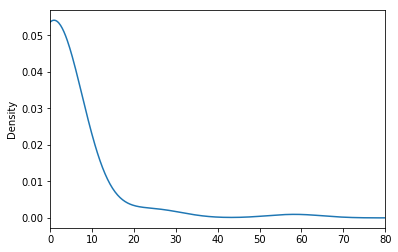

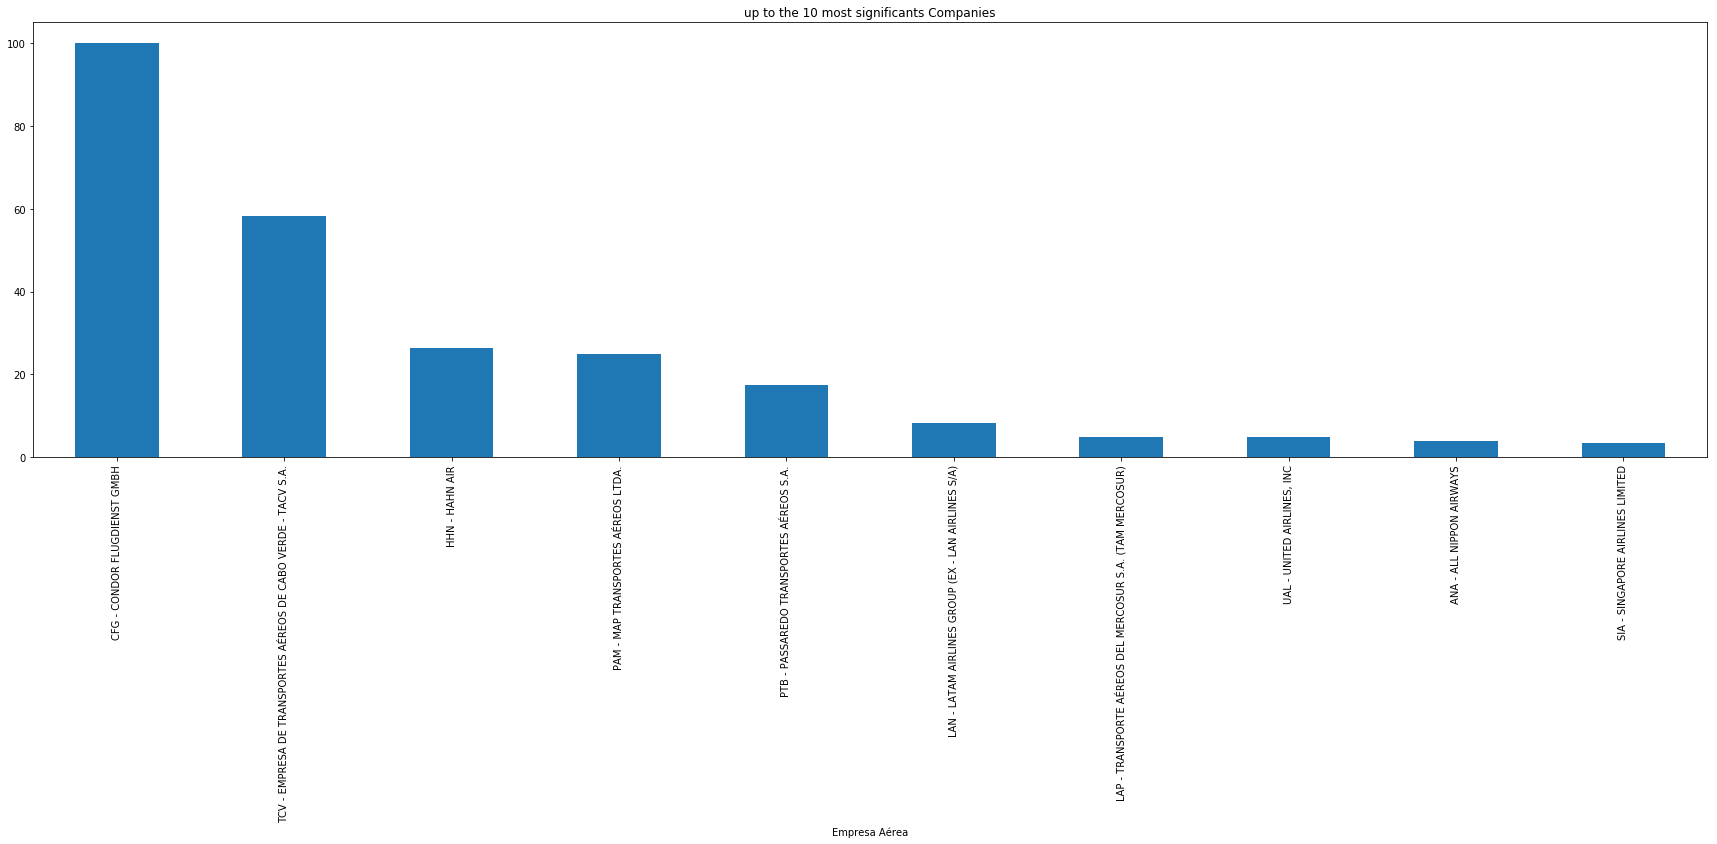

Airport distribution:


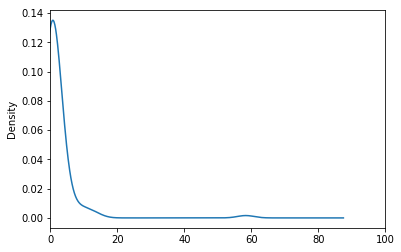

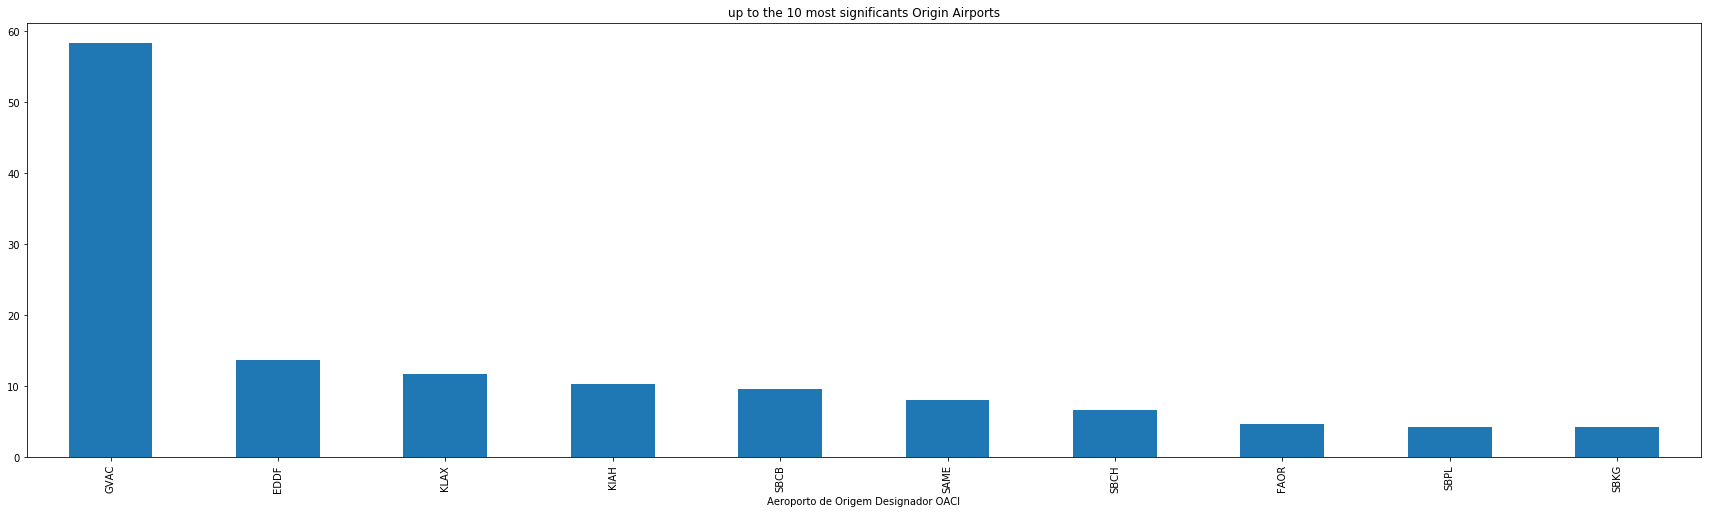

In [15]:
keys_airport_dest = q1_data.groupby("AEROPORTO DE DESTINO (SIGLA)").groups.keys()
keys_airport_orig = q1_by_airport.groups.keys()

q2_data = q2_raw.loc[(q2_raw["Aeroporto de Origem Designador OACI"].isin(keys_airport_orig)) &
                     (q2_raw["Aeroporto de Destino Designador OACI"].isin(keys_airport_dest))]


q2_by_company = q2_data.groupby("Empresa Aérea")
q2_by_airport = q2_data.groupby("Aeroporto de Origem Designador OACI")
print("Company distribution:\n=================================")
departures= q2_by_company["% de Cancelamentos"].mean()
dist_plot([0, 80], departures, "Cancelation Percentage")
bar_plot(departures, "Companies")
print("Airport distribution:\n=================================")
departures= q2_by_airport["% de Cancelamentos"].mean()
dist_plot([0, 100], departures, "Cancelation Percentage")
bar_plot(departures, "Origin Airports")

## Q3)

Let's rephrase the prompt: 
Show that $d_k(p,q) = (\sum^d_{i=1}c_i|p_i-q_i|^k)^{1\over{k}}$ is a distance function. If $v = q-p$, we can simplify: $d_k(v) = (\sum^d_{i=1}c_i|v_i|^k)^{1\over{k}}$

Therefore, we need to show that: <br>
1) $d_k(a, b) + d_k(b, d) \ge d_k(a, d)$ <br>
2) $d_k(v) = d_k(-v)$ <br>
3) $d_k(v) = 0 \rightarrow v = 0$ <br>
4) $d_k(v) \ge 0$ <br>
1) Let $u = b-a, v = d-b, w = d-a, f_i = c_i^{\frac{1}{k}}, c_i \ge 0, k \ge 1$
$$
d_k(u) + d_k(v) \ge d_k(w) \\
d_k(w)=(\sum^d_{i=1}c_i|w_i|^k)^{1\over{k}} \\
d_k(w)=(\sum^d_{i=1}c_i|v_i+u_i|^k)^{1\over{k}} \\
d_k(w)=(\sum^d_{i=1}|f_i(v_i+u_i)|^k)^{1\over{k}} \\
$$

Given Minkowski inequality: $$ \left(  \sum\limits_{k = 1}^{n} |x_{k}+y_{k}|^p  \right)^\frac{1}{p} \leq  \left(\sum\limits_{k = 1}^{n} |x_{k}|^p  \right)^\frac{1}{p} + \left(  \sum\limits_{k = 1}^{n} |y_{k}|^p  \right)^\frac{1}{p}   $$

with $1 \leq p \leq \infty$ and $x, y \in R^n$

$$
d_k(w)=(\sum^d_{i=1}|f_i(v_i+u_i)|^k)^{1\over{k}} \leq
(\sum^d_{i=1}|f_i(v_i)|^k)^{1\over{k}} + (\sum^d_{i=1}|f_i(u_i)|^k)^{1\over{k}} = d_k(a, b) + d_k(b, d)
$$
2)
$$
\text{Since }|v_i| = |-v_i| \\
d_k(v) = (\sum^d_{i=1}c_i|v_i|^k)^{1\over{k}} = (\sum^d_{i=1}c_i|-v_i|^k)^{1\over{k}}
$$
3) [Contradiction] <br>
$$
(\sum^d_{i=1}c_i|v_i|^k)^{1\over{k}} = 0\\
\text{Let }v_j \neq 0\\
\text{(I)}(c_j|v_j|^k + \sum^d_{\substack{i=1 \\ i\neq j}}c_i|v_i|^k)^{1\over{k}} = 0\\
\text{Since }(\sum^d_{\substack{i=1 \\ i\neq j}}c_i|v_i|^k)^{1\over{k}} \ge 0 \text{(proof 4)}\\
\text{Then (I)} > 0
$$
4) <br>
This part is false if we let $c_i < 0$, so let's suppose $c_i \ge 0$:
The n-root of a non-negative number is non-negative. <br>
$|p_i-q_i|^k \ge 0$. <br>
$c|p_i-q_i|^k \ge 0 (\Leftrightarrow c \ge 0$). <br>
Since $d_k$ is a sum of non-negative numbers, it is non-negative.

## Q4)

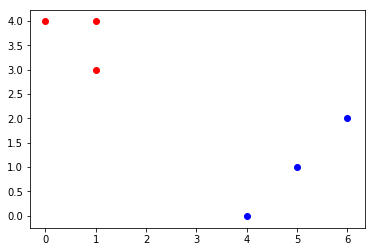

In [12]:
from sklearn.cluster import KMeans

S = np.array([[1,4], [1,3], [0,4], [5,1], [6,2], [4,0]])
x = [1, 1, 0, 5, 6, 4]
y = [4, 3, 4, 1, 2, 0]
k = 2
kmeans = KMeans(n_clusters=k).fit(S)
labels = kmeans.predict(S)
colmap = {0:'red', 1:'blue'}
for i in range (6): plt.scatter(x[i], y[i], color=colmap[kmeans.labels_[i]])

## Q5)

-------------
1 - Suppose you build a classifier that answer yes on every possible input. What precision and recall will this classifier achieve?

Precision := $\text{#True Positive}\over \text{#True Positive + #False Positive}$
Recall := $\text{#True Positive}\over \text{#True Positive + #False Negative}$

Since the classifiers always labels 'yes':<br>
Precision = $\text{#True Positive}\over \text{#Samples}$ <br>
Recall = $\text{#True Positive}\over{\text{#True positive}}$ = 1 <br>

Therefore, while de recall will always be 1, the precision can be as bad as required.

-------------
2 - Explain what precision and recall are. How do they relate to the ROC curve? Is it better to have too many false positives, or too many false negatives? Explain.
<img src="q5/roc.png"> <br>
- [link](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
As the formula in part 1 shows, precision is the measurment of correct True labels by all the Trues the program labeled and recall is the avlue of the correct True labels over all the actuals Trues in the data. Defining the terms on the image: <br>
TPR = $\text{TP}\over{\text{TP + FN}} $ = Recall <br>
FPR = $\text{FP}\over{\text{FP + TN}}$ = 1 - Specifity = 1 - $\text{TN}\over{\text{TN + FP}}$<br>
(As we can see, reacll is very important to the curve, but the actual precision is irrelevant (of course it means something once you consider it affects all the labeling relations).
A good model has the Area (AUC) close to 1.0 and a bad model has it close to 0. To increase the area of a curve, we need to increase the recall and the specificity. However, to increase each of them ,we must decrease the FP or the FN labels. Therefore, neither is more important than the other and they have their own balance of importance.

-------------
3 - What is cross-validation? How might we pick the right value of k for k-fold cross-validation?
Cross validation is the techinique of partitioning the dataset into two groups and using one of this parts to validade the analysis made on the other part. The value of k in k-fold cross-validation defines the proportion of the size of the training and test groups. There is no ideal value of k. Even though the actual value might not have much impact in the analysis, an interested person might iterate over a few values to find a better value for k.

-------------
4 - Explain why we have training, test, and validation data sets and how they are used effectively?
It is important to separate the available dataset between training and test because it allows you to very the quality of the analysis based on cross-validation. The validation dataset is usually a dataset that is not available to public for either training or tests. The validation dataset is important because when a person/company orders an analysis or neural network, for example, it may use the validation set, that was never disclosed, to verify the quality of the offered product.

-------------
5 - Explain why we need so many performance measures for a classifier (precision, recall, F1, accuracy etc) and how they are used in practice?
Performing measurements for classifiers is an essential part of learning methods (that are based on improving the classification). It is quintessential to have a variety of error calculations and measurements because there are diferrent types of error (type I and II for T/F classification, for example) and it is not enough or correct to focus in only one of those. Without a measurement statistic, it would not be possible to compare two classification results, let alone quantify how much a classification is betterthan the other.



## Q6)

The website I choose is https://g1.globo.com/, more specifically: https://g1.globo.com/globonews/jornal-globonews/. The images taken will be referenced from the videos found in the link. Images will be printed as I do not have access to an png. Another commentary is that, because the souce of graphs is videos, some graphs are spread out across different photos and, because the data might be from bid experiments, at times, not all of the results will be shown here. I did not choose a form of data vizualization that is not a literal chart or plot, although is a very common representation of data in videos. The last image is a very common way to represent data in television, although it is not the usual way we plot a barplot in the computer, so I thought it would be interesting to check one example of that.

### 1.
There are two different lines plotted in the same axis. The graphic conveys that during the last 15 years there was a strong correlation between the lines, but very recently, with the growth of deflorestation, is not matched by the growth in denouces. It does a very good job in that regard because, although they have different metrics in the y-coordinate, they were able to show the correlation, because the labels are very clear and simple. The colors do a great job, because red a good color to represent danger and yellow is typically used for warnings. I think one valid modification is adding perpendicular lines crossing the x-axis that showls relevant policies that might have acused the local changes.
<img src="q6/p1.png">
- [link](https://g1.globo.com/globonews/jornal-globonews/video/representantes-de-quase-200-paises-tentam-fechar-acordo-na-cop-25-8166426.ghtml)

### 2.
The graphic below is very simple but is an interesting choice for the data it conveys. It is supposed to show the approval rate, as time passed, and it succesfully achieved that. The presentation could be better as there is no clear reason for only one midpoint throughout the year, and it does not reveal much. Using a chart that is supposed to show changes across time, you would expect to be able to match those changes with political events. That is not possible in this case, but, since the data might only be acquired in a small set of dates, it is understandable. The color scheme is very good as bas and good are usually represented with the red and blue colors, respectively. The graph, if at all possible, would greatly benefit from more midpoints.
<img src="q6/p2.png">

- [link](https://g1.globo.com/globonews/jornal-globonews/video/datafolha-72-avaliam-gestao-de-marcelo-crivella-como-ruim-ou-pessima-8167214.ghtml)

### 3.
The graphic below shows the opinion of Rio de janeiro's citizens about various subjects. The data seems like the result of a questionaire and that the horizontal bar chart would be a good choice, if not for two factors. The labels are very long and it really damages the readability, regadless of the bold font, as it is shown in a television most of the times. A second problem is the clear distinction between the first four bars and the last two. The last two results are not relevant for the opinion of the citizens about their politicians and should be removed. The last two bars are also bigger than the first four, and, as a rule, they should be higher than the others. The color, in this case, seems to be irrelevant but I think red is always a good choice when it comes to politics (because it is very often that they are red, and I see no reason to change that).

<img src="q6/p3.png">

- [link](https://g1.globo.com/globonews/jornal-globonews/video/datafolha-72-avaliam-gestao-de-marcelo-crivella-como-ruim-ou-pessima-8167214.ghtml)

### 4.
The first observation about the "graphic" below is that is was not presented as a single block, but in two different segments. I do not think it is inherently bad, as it is a medium that the image tries to follow what is said, and information said over 40s in the past might not be quintessential to what is said now. However, if it was in another medium, like a paper, I might reconsider the comment, as plots are, traditionally, a single image. The results do not seem to be very reliant on each other, so, separating the bars is also not bad (as comparing their relative size hardly has any meaning). While the axis are not explicit, it follows the convention that percentages goes from 0 to 100, so it is not a problem, like is the third example. The colors do not damage readability and are probably irrelevant, so I think they are okay. I believe, however, if there were more results, or they could be reoganized as to divide the bars into two different graphics that fit in one slide, it would be a small improvement.

<img src="q6/p4_1.png">
<img src="q6/p4_2.png">

## Q7)

<p style="text-align: center; font-style: italic;"> Abstract </p>
<p> It is possibly common knowledge at this point that learning algorithms, that learned from biased data, are biased in its decisions. Together with this realization, explanations and possible solutions were proposed and spread. This paper will focus on disproving the idea that deleting the social category data, like sex, race and religion, from the data available to decision taking algorithms reduces its bias. Together with this acticle it is argued that the bias resultant from other data might recreate the social category data and, in this process, make it more difficult to detect biases. When many variables are available it is most natural there to exist corelation between variables and that makes it harder to exclude an knowledge (as opposed to variables), making the effort of removing this information futile.</p>
<p> It is also argued that the fact that algorithms replicate the social category bias even without the explicit data has a side effect: excluding the social category of the people the datasets missed. For any reason it may happen, there are people not tracked by the most common data acquiring techniques and, while it may seem like a good thing for some people, it actually ends up damaging the algorithm, that becomes biased by not recognizing such groups. </p>
<p> The vey own origin of the big datasets that are used in the algorithms, data brokers, is already contaminating the resulting decision-taker, by connecting a wide range of small data from different places into one profile, that inherently has variables closely related. The main topic of the paper, and the side note mentioned above, make a great deal of sense and meets practical results.
</p>
<p> A second focus of the arcticle is to propose scenarios and "remedies" to the situation presented based on the knowledge discussed earlier. The four cases present very specific examples where using data based decision-takers seems appropriate and data bias is very clearly seen. In al situations, one would be tempted to remove social-categorical data and believe the bias would be improved but in all cases, as he claims it fails, he presents a solution that does not exclude information. Instead, for example, in remedy 2, it mentions a tequinique of detecting discrimination in exhisting questions, rather than on the creation of questions that are unbiased.
</p>
<p> Soon after, the conclusion portion re-states the main points and reiforces the need to review the how algorithmic decision-making is used. This last portion of the text was important to understand, if the reader did not know techiniques previously, that there are alternatives that allow the use of data formatted in the way it is while restraining bias. Previosly it was uncertain on how to avoid bias because it seemed impossible to dodge the social category influenced labeling. The specific examples worked well to tie up the loose ends of the text and to strenghten the main point of stopping to believein the deletion of data from the datasets.
<p> Keywords: algorithmic discrimination, learning social category data, ommited variable

## Q8)
1) I did not watch two lectures. In one of them I had an exam soon after 10AM. In the other one, I was very sick and missed two days of classes.

2) In most classes i think I grasped around 80%, what I think is absolutely fantastic as there were many different levels of people present and I consider myself in the worse end in this class topic. In some classes I grasped very little and that is because a little previous knowledge was required and I, unfortunately, had none.

3) I believe I did not miss any of the group activities. I think the activities were great. I think I did well too, because I am usually not shy and like to contribute.

4) For the EDA part of the class, I think I learned very interesting graphic formats and I believe I added them to "my sleeves". For the more specific subjects:
 - I believe I understand the impurity calculation methods and would be able to apply this knowledge to other areas. I studied more during the weekend we went over those and discuted it with two friends. I also studied it again for the exercise list.
 - The very basics of using machine learning libraries (I had never even imported any library of this area). I think it opened doors for me to study further. I think I went futher with the clustering techiniques because I could not understand decision trees in class and put some hourst of study in that.
 
5) I do not think my study was important to help following the class because, possibly a mistake, I focused more on  curiosities than on "ground work". I am not sure how many hours each week, but, in average, I think one hour (as in some weeks I did not even go through the notbooks.

6) I think I enjoyed and was motivated to attend all but one class (SQL class, that I never used for more than 30 minutes straight before). I am not sure how to make it better as I was almost a complete stranger to the class topics.
 
7) The class surpassed my expectations. I wrongly believed the classes would be a continous "learning string", where each class would be continuing the previous (roughly). I thought in this "journey" I would find a few topics that I would find interesting and would be introduced to the subjects I did not know about (I was aware I was a stranger to the class topic). The class was, intead, cut to the point of only developing this interesting and new topics I was looking for, and found.

8) I still do not know how to name the different forms of machine learning techniques and in what to apply each of them. I find it important simply because they are buzzwords and I would feel unconfortable if someone knew I do not know when to use unsupervised/supervised techiniques (that are buzzwords ,for example). Other than this foolishness, I cannot point to anything specific.

9)
- General:
    - Not hard for someone that is confortable with data science
    - Enough possibilities to allow more and less advanced people to achieve something interesting (in their own views)
- Individual task:
    - I had muchg more trouble than necessary because I introduced many bugs early on
    - Task was clear but the dataset did not match what we discussed in class, so I had to reformulate the questions
    - I think it was adequate work and really followed the classes at that point
- Group task:
    - In my case, I did not use the same dataset as the other teammate, as there were multiple available and we chose different ones
    - My partner was much more experienced and it was great for me, but I think was bad for him
    - The work was easier, I believe, but with less time
        - I think we could have less time for individual and more for group, that seemed more benefitial (learning wise)
- Decision Tree:
    - Gladly we had a lot of time, because it was really over my head
        - I think someone the was knowledgeable might have found it easy
    - Did match was discussed in class
    - Fair with the long due date
- Final Exam:
    - Fair considering the time given (impossible, for me, otherwise)
    - Q3 seems poorly writen (I believe there are condition for the variables that were not mentioned)
    - Q4 is not clear. What is "manually"? Going over each equation by hand?
    
10)
It is important to notice that it was my second experience with EDA and my first with impurity/error calculation, learning methods. I think it was not properly introduced to the thought about the social consequences of the intensive use of data, but I definitely spent time on the topic beforehand. However, despite this, I do not think I missed too much of the classes main topics. Although it felt like my profile was not the main target of the class, I did not feel left out or outcasted.

I am usually very attentive and participative in classes and this was no exception. I don't think I saved a comment I found interesting to myself once during the semester. I think I never went to the classroom to do anything other than watch the class and study the subject (no parallel work or distracting activities). I think in the three personal works I invested a lot of time and learned a lot. I know they are not the best works you will see, but I do not think I am embarassed by any of them. The group work I think I did not contribute as much as my partner Juliano, unfortunately. We spent the same amount of time, because we worked together, but I think I could not put a lot of efficient work in. 

I think I did well regarding the homework assignments. I know I put more time than the people I asked to, but I know I am not the most efficient. As I did not went over other people's notebooks it is hard to evaluate if my results and if the work I put was enough to meet the goals, but I think it was okay. I think I participated very well in class and did well in the assignments. I cannot say a specific grade, but something like 8.0 + $\delta$, where $-2 \leq \delta \leq 2$ reflects how well I did in the exercise list/exam seems very fair to me.
